# Iris Species

Classify iris plants into three species in this classic dataset.

From: https://www.kaggle.com/uciml/iris
<br/>Data source: UCI Machine Learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read data from csv

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Get unique labels from data

In [4]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
n_records = data.shape[0]

print('Number of records: {}'.format(n_records))

Number of records: 150


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Separate labels and features for pre-processing.

In [7]:
species_raw = data['Species']
features_raw = data.drop(['Id', 'Species'], axis=1)
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm']

### Visualization

Visualize features to observe range and distribution of values. If the distribution is skewed, then we may have to transform it.

In [8]:
def visualize(data, features):
    fig = plt.figure(figsize = (15,10));
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(2, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")

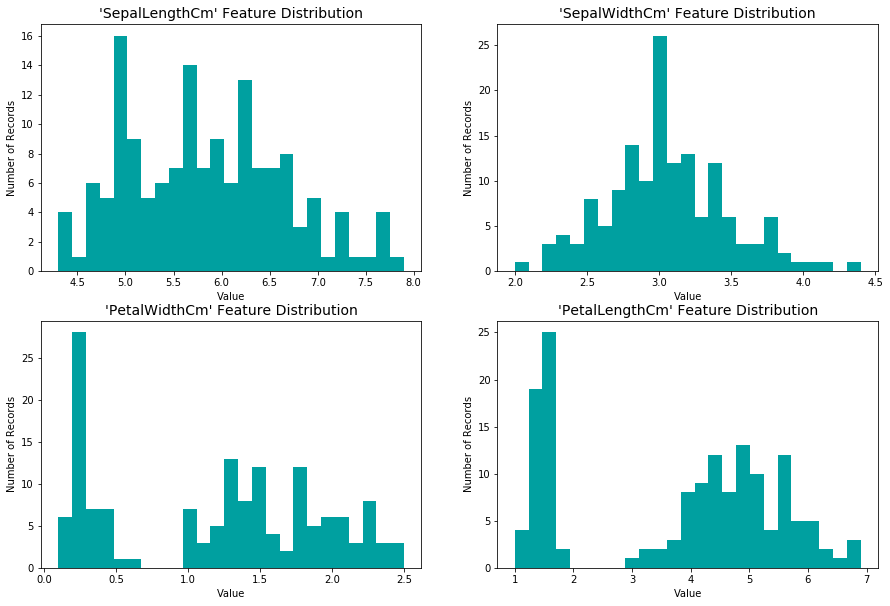

In [9]:
visualize(data, feature_cols)

The features are not skewed. Just normalize the values. Now, let us look at the features for any patterns.

In [10]:
def scatter_plot(x1, y1, x2, y2):
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(data[x1], data[y1])
    ax.set_title('{} vs {}'.format(x1, y1))
    ax.set_xlabel(x1)
    ax.set_ylabel(y1)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(data[x2], data[y2])
    ax.set_title('{} vs {}'.format(x2, y2))
    ax.set_xlabel(x2)
    ax.set_ylabel(y2)   

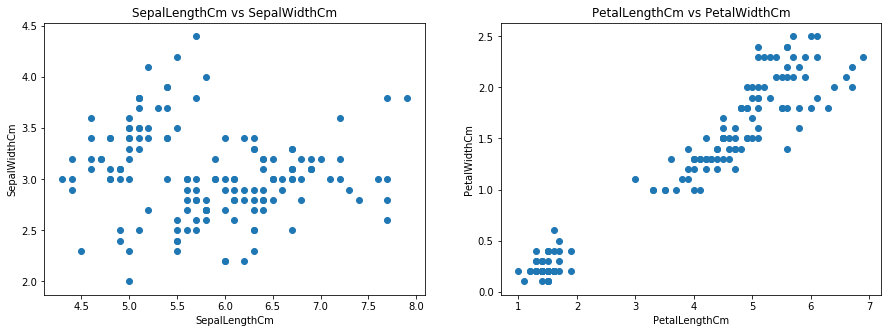

In [11]:
scatter_plot(x1='SepalLengthCm', y1='SepalWidthCm', x2='PetalLengthCm', y2='PetalWidthCm')

Now, for a closer look into how this scatter plot is labelled.

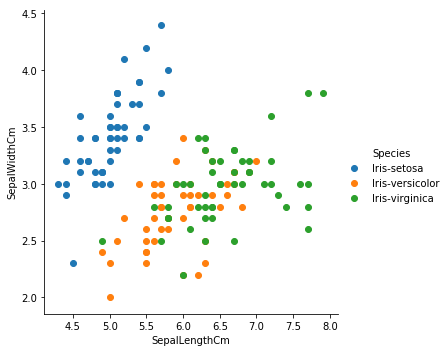

In [12]:
sns.FacetGrid(data, hue='Species', size=5) \
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
   .add_legend()

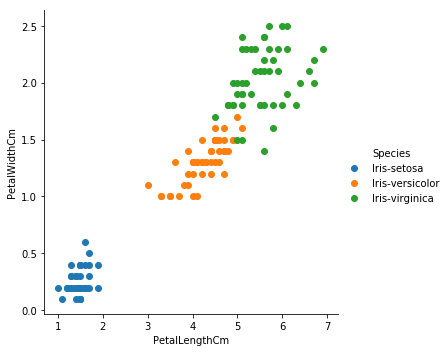

In [13]:
sns.FacetGrid(data, hue='Species', size=5) \
   .map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm') \
   .add_legend()

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_df = pd.DataFrame(data=features_raw)
features_df[feature_cols] = scaler.fit_transform(features_df[feature_cols])
features_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


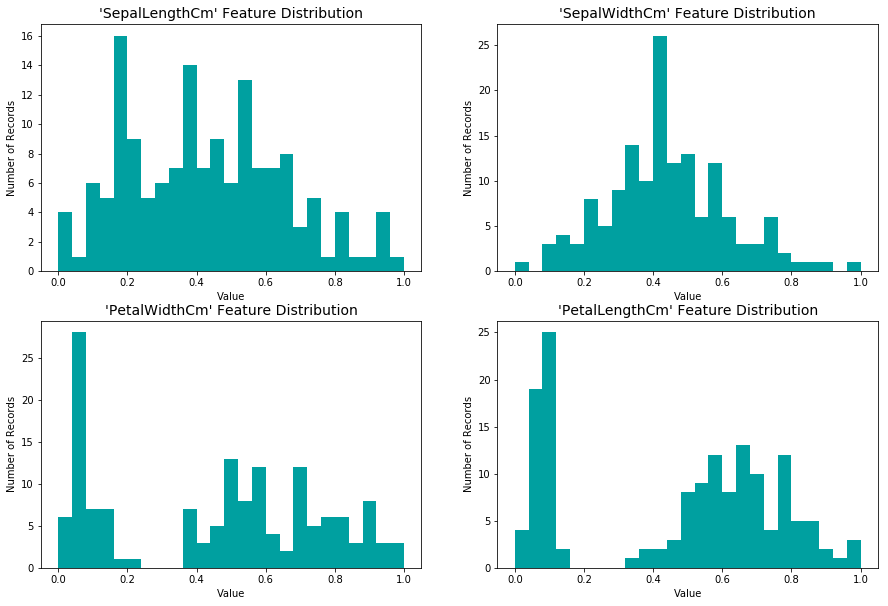

In [15]:
visualize(features_df, feature_cols)

Convert categorical labels into numerical for uniformity.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5f5d87b00>]],
      dtype=object)

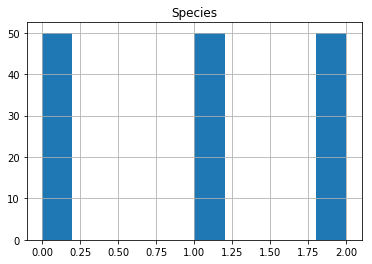

In [16]:
species_df = pd.DataFrame(species_raw)
species_df['Species'] = species_df['Species'].astype('category')
species_df = species_df.apply(lambda x: x.cat.codes)
species_df.hist()

### Create train and test data-set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df.values, species_df.values, 
                                                    train_size=0.7, test_size=0.3)

In [18]:
print('Sizes of:-\ntrain data-set: {}\ntest data-set: {}'.format(X_train.shape, X_test.shape))

Sizes of:-
train data-set: (105, 4)
test data-set: (45, 4)


### Training Pipeline

The model is used to make predictions on the train and test data-sets. Accuracy and f-beta scores(beta=0.5) are used to measure the efficiency of the model.

In [19]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    outcome = {}
    
    outcome['acc_train'] = accuracy_score(y_train, predictions_train)
    outcome['acc_test'] = accuracy_score(y_test, predictions_test)
    outcome['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5, average='micro')
    outcome['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
    
    return outcome

### Classifiers

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clfs = [GaussianNB(),
        RandomForestClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        BaggingClassifier(random_state=42),
        LogisticRegression(random_state=42), 
        SGDClassifier(random_state=42),
        DecisionTreeClassifier(random_state=42),
        KNeighborsClassifier(n_neighbors=3),
        SVC(gamma='auto')
       ]

results = {}

for clf in clfs:
    results[clf.__class__.__name__] = train_predict(clf, X_train, y_train, X_test, y_test)

### Results

In [21]:
for classifier, result in results.items():
    print('Classifier: {}'.format(classifier))
    print('Train Accuracy: {}, Train F-score: {}'.format(result['acc_train'], result['f_train']))
    print('Test Accuracy: {}, Test F-score: {}\n'.format(result['acc_test'], result['f_test']))

Classifier: GaussianNB
Train Accuracy: 0.9523809523809523, Train F-score: 0.9523809523809524
Test Accuracy: 0.9777777777777777, Test F-score: 0.9777777777777777

Classifier: RandomForestClassifier
Train Accuracy: 0.9809523809523809, Train F-score: 0.9809523809523809
Test Accuracy: 0.9777777777777777, Test F-score: 0.9777777777777777

Classifier: GradientBoostingClassifier
Train Accuracy: 1.0, Train F-score: 1.0
Test Accuracy: 0.9555555555555556, Test F-score: 0.9555555555555557

Classifier: BaggingClassifier
Train Accuracy: 0.9904761904761905, Train F-score: 0.9904761904761905
Test Accuracy: 0.9333333333333333, Test F-score: 0.9333333333333333

Classifier: LogisticRegression
Train Accuracy: 0.8380952380952381, Train F-score: 0.8380952380952381
Test Accuracy: 0.8888888888888888, Test F-score: 0.8888888888888888

Classifier: SGDClassifier
Train Accuracy: 0.6952380952380952, Train F-score: 0.6952380952380952
Test Accuracy: 0.7333333333333333, Test F-score: 0.7333333333333333

Classifier: 